# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [4]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [6]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [7]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))

# reshaping
data_train = resize_images(data_train, (28,28))
data_test = resize_images(data_test, (28,28))

# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

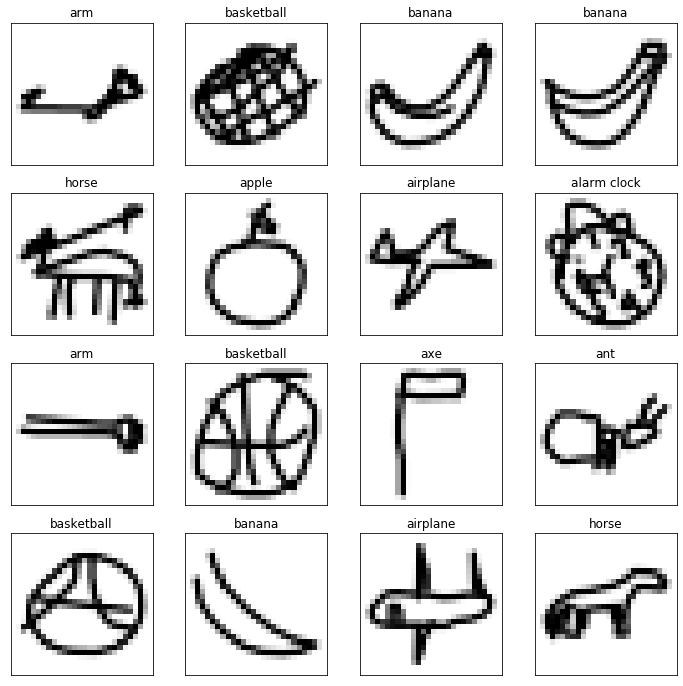

In [8]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [9]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
data_train.shape[1]

784

**WARNING**: This cell will take a significantly long time to run

In [8]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.7857 - accuracy: 0.3662
Epoch 2/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.3902 - accuracy: 0.4831
Epoch 3/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.3496 - accuracy: 0.5013
Epoch 4/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.4021 - accuracy: 0.5012
Epoch 5/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.4594 - accuracy: 0.4896
Epoch 6/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.4479 - accuracy: 0.4862
Epoch 7/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.4847 - accuracy: 0.4868
Epoch 8/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.5528 - accuracy: 0.4586
Epoch 9/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.4291 - accuracy: 0.4820
Epoch 10/500
100000/100000 [

In [12]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model- report 4-2 - 5 layers.h5')

In [11]:
from numpy import loadtxt
from keras.models import load_model

model = load_model('pa2-part2-model- report 4-2 - 5 layers.h5')

In [12]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.1


In [14]:
[test_loss, test_acc] = model.evaluate(data_test, label_test)

25000/25000 [==============================] - 1s 35us/step
